# FOLLOW THESE STEPS 

**First** : Let me Put You on the Road.

If you are using Google Colab please Execute the following Code in next Cell  , so you will give the Permission for Google Colab to Access your folders in Google Drive 

***DO NOT RUN IT IF YOU ARE ON JUPYTER ***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('drive/My Drive/datasets')

In [4]:
!ls

Insurance.xls


**Second**  Let's Install Our Dependencies 
`xlrd` is used for  Reading Excel Files 


In [5]:
!pip install xlrd

**Third** : Let's Now Import the Packages that we are going to use 

In [6]:
import numpy as np   # For Matrices Manipulations
import pandas as pd  # For Data frames etc 
import xlrd  # For Excel Files
import os   # For Changing to the Correct Directory 

In [7]:
!ls            #  its an Order to List all files in the Current Directory You are in 

Insurance.xls


In [ ]:
os.chdir('drive/My Drive/.............. ????')       # Try to fix this to  the Correct path So you can find The file

**Forth** :  Type a Code to Read  The Excel File 
hint go and use `pd.read_excel`

In [8]:
df= pd.read_excel("Insurance.xls")
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


So this Data is about:-

Auto Insurance in Sweden
In the following data

X = number of claims

Y = total payment for all the claims in thousands of Swedish Kronor

for geographical zones in Sweden
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance



**Fifth** Type a Code  that Change the Features and Labels  from pandas frame into Numpy Arrays.

*40 rows only* for **Training** and the Rest for **Testing**
hint : use `df.iloc` ,`.values` 

In [9]:
X_train= df.iloc[:40, 0] 
y_train= df.iloc[:40, 1]
X_test= df.iloc[40:, 0]
y_test= df.iloc[40:, 0]

**Sixth** Check the Type and Size of the Arrays you created by Printing them.
hint Go and use :  `shape` , `type` 

In [10]:
print('The Features to be trained on :', X_train.shape)
print('The Labels to be trained on :', y_train.shape)
print('The Features to be tested on :', X_test.shape)
print('The Labels to be tested on :', y_test.shape)
print('X_train type : ', X_train.dtype, 'X_test type :',X_test.dtype ,'y_train type :', y_train.dtype , 'y_test type :', y_test.dtype )

The Features to be trained on : (40,)
The Labels to be trained on : (40,)
The Features to be tested on : (23,)
The Labels to be tested on : (23,)
X_train type :  int64 X_test type : int64 y_train type : float64 y_test type : int64


**Seventh** Let me do this for you  but watch me properly, its for Visualization.

<function matplotlib.pyplot.show>

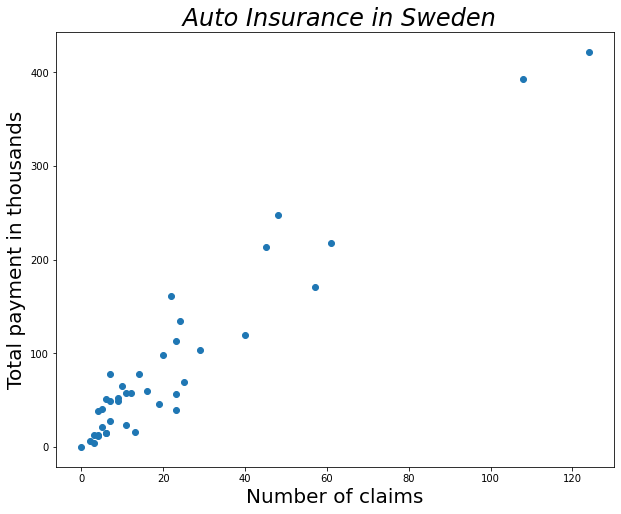

In [12]:
import matplotlib.pyplot as plt  # A Great Package For Plotting and Visualization
plt.figure(figsize=(10,8))    # The Plotting Window Size
plt.title(' Auto Insurance in Sweden', fontsize=24 , fontstyle='italic')  # Title , Font size and Style
plt.xlabel('Number of claims', fontsize=20)   # Label of x axis
plt.ylabel('Total payment in thousands', fontsize=20) # Label of y axis
plt.scatter(X_train , y_train)  
plt.show

Hungry for Statistics ?
Okey Let's Go for it, But Do you even remember the Expressions?

**Eighth** ? I don't know how to type this  but i meant 8th
Okey, Whatever Just Go and build a Function Mean Squared Error and call it `MSE()` That Takes a List of Actual Values and List of Predicted Values  then Returning the Mean Squared Error between them 


In [13]:
def MSE (actual, predicted):
    '''
    Input: * actual : List of Actual Data
           * predicted: List of Predicted Data
    Return: Mean Squared Error       
    '''
    squared_error = 0  # intialization by zero
    for i in range(len(actual)) :
        squared_error += (actual[i] - predicted[i])**2
        return (squared_error / len(actual))

**Ninth** Build  Following Functions:

1- `Mean()`  its input :  Values ,  its Ouput : Mean of the Values.

2- `Variance()` its input : Values, Mean , its Output : Variance of the Values.

3- `Covariance()` its input : Values of X, X_mean , y_mean ,y, its Output : Covariance of X and Y.



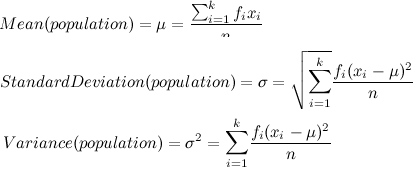

In [14]:
# Mean Function
def Mean (values):
    '''
    Input: List of values
    Output: Mean of these values
    '''
    return(sum(values) / len(values))

# Variance Function
def Variance(values, mean):
    '''
    Inputs : - List of values
             - The mean of these values
    Output : Variance of the values
    '''
    sum_diff = 0
    for value in values :
        sum_diff += (value - mean)**2
    return(sum_diff / (len(values) - 1))
    
# Covariance Function
def Covariance(x_values, y_values, x_mean, y_mean):
    '''
    Input: * x_values : List of Features
           * y_values : List of Output Labels
           * x_mean : Mean of Features
           * y_mean : Mean of Output Labels
    Return: Covariance of Data       
    '''
    sum_var= 0
    for i in range(len(x_values)):
        sum_var += (x_values[i]-x_mean)*(y_values[i]-y_mean)
    return sum_var/(len(x_values)-1)

**Tenth** : watch out for a Sensitive Point you now need to build a Function that will use  the Previous Functions to return the Co-efficents of the Best Fit Line  which  is Beta Zero and Beta One 

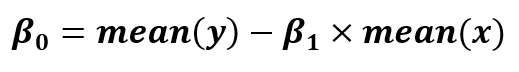


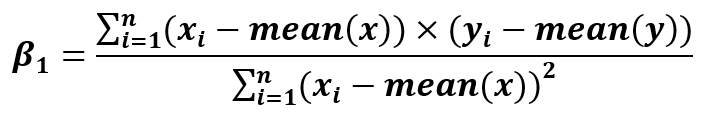

Alternate way for Beta One 


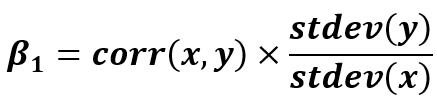

In [15]:
# Coefficents Function
def Coefficents(cov, var_x, x_mean, y_mean):
    '''
    Input: * cov : Covariance of Data
           * var_x : Variance of Data
           * x_mean : Mean of Features
           * y_mean : Mean of Output Labels
    Return: Coefficents of Linear Equation       
    '''
    b1= cov/var_x
    b0= y_mean - b1 * x_mean
    return b0,b1

**Eleventh**: Build a function  that will take the Input Training Data and Testing the Data , Then call the Co efficient Function with the Training Data to get the Co efficents then use it for Building the Best fit Line and return the Predictions of the Test set 


In [16]:
# Simple Linear Regression Function
def SimpleLinearRegression(X_train, y_train, X_test):
    '''
    Input: * X_train : List of Training Features
           * y_train : List of Training Labels
           * X_test : List of Test Features
    Return: List of Prediction for Test Features       
    '''
    x_mean = Mean(X_train)
    y_mean = Mean(y_train)
    x_var= Variance(X_train, x_mean)
    cov= Covariance(X_train, y_train, x_mean, y_mean)
    b0, b1= Coefficents(cov, x_var, x_mean, y_mean)
    y_pred = b0 + X_test * b1
    return y_pred

**Twelveth**: Finally Build a Function that Calls The `MSE` function and the `SimpleLineRegression` Function and use it to Print the Result as an Evaluation for the model

In [17]:
# Evaluate Function
def Evaluate (X_train, y_train, X_test, y_test):
     '''
    Input: * X_train : List of Training Features
           * y_train : List of Training Labels
           * X_test : List of Test Features
           * y_test : List of Test Labels
    Return: Mean Square Error of Prediction and Actual Test Labels       
    '''
    y_pred= SimpleLinearRegression(X_train, y_train, X_test) 
    return MSE(y_test, y_pred)

Let me Now visualize your work for you ! Just help me with the Naming

<function matplotlib.pyplot.show>

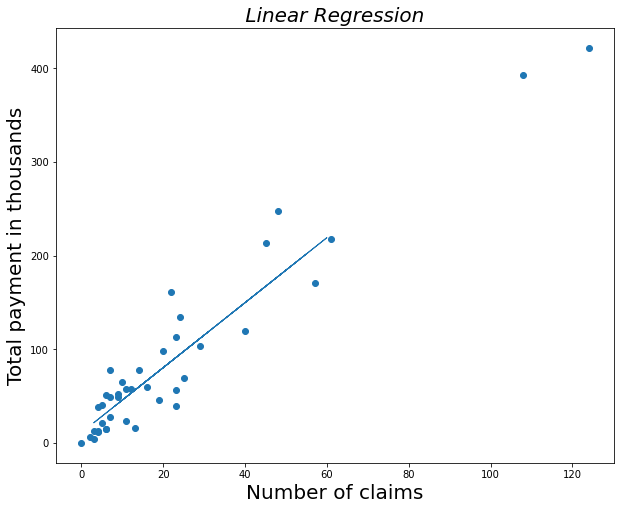

In [20]:
plt.figure(figsize=(10,8))
plt.title(' Linear Regression ', fontsize=20 , fontstyle='italic')
plt.xlabel('Number of claims', fontsize=20)
plt.ylabel('Total payment in thousands', fontsize=20)
plt.plot(X_test, SimpleLinearRegression(X_train, y_train, X_test), linewidth=1.0)  
plt.scatter(X_train ,y_train , alpha =1, label='Y')
plt.show


# Thank You